In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [54]:
df = pd.read_csv("data/data_merge.csv")

In [55]:
num_columns = [col for col in df.columns if df[col].dtype != "object"]
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

std = StandardScaler()
ohe= OneHotEncoder(sparse_output=False)

log_1p = FunctionTransformer(func=np.log1p)
preprocessor_pca = ColumnTransformer(
    transformers=[
        ("ohe",ohe,cat_columns),
        ("log",log_1p,num_columns)
    ]
    
)
tsne=Pipeline([
     ('preprocessor', preprocessor_pca),
     ('std', std ),
     ("tsne", TSNE(n_components=3,random_state=42,verbose=2,n_jobs=-1))
])

tsne_value = tsne.fit_transform(df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 92901 samples in 0.003s...
[t-SNE] Computed neighbors for 92901 samples in 12.006s...
[t-SNE] Computed conditional probabilities for sample 1000 / 92901
[t-SNE] Computed conditional probabilities for sample 2000 / 92901
[t-SNE] Computed conditional probabilities for sample 3000 / 92901
[t-SNE] Computed conditional probabilities for sample 4000 / 92901
[t-SNE] Computed conditional probabilities for sample 5000 / 92901
[t-SNE] Computed conditional probabilities for sample 6000 / 92901
[t-SNE] Computed conditional probabilities for sample 7000 / 92901
[t-SNE] Computed conditional probabilities for sample 8000 / 92901
[t-SNE] Computed conditional probabilities for sample 9000 / 92901
[t-SNE] Computed conditional probabilities for sample 10000 / 92901
[t-SNE] Computed conditional probabilities for sample 11000 / 92901
[t-SNE] Computed conditional probabilities for sample 12000 / 92901
[t-SNE] Computed conditional probabilities for sa

In [57]:
import pickle
pickle_out = open("tsne.pkl", "wb") 
pickle.dump(tsne_value, pickle_out) 
pickle_out.close()

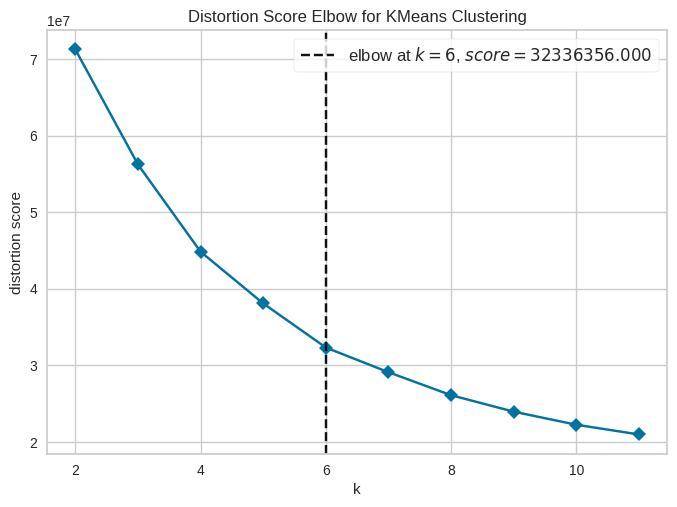

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(n_init=10,random_state=42),metric="distortion", k=(2,12),timings=False)

visualizer.fit(tsne_value)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [59]:
kmeans = KMeans(n_clusters=6,n_init=10,random_state=42)
kmeans.fit(tsne_value)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [60]:
df["label"]=kmeans.labels_

In [61]:
df

,nb_items_total,montant_total,nb_commande,payment_type_most_frequent,most_frequent_product_category,mean_review_score,mean_payment_installments,mean_length_comment_title,mean_length_comment_message,mean_distance,recence,med_product_photos_qty,med_product_description_lenght,label
0,1.0,141.90,1,credit_card,Furniture,5.0,8.0,15.0,111.0,1.047809,165.0,1.0,236.0,5
1,1.0,27.19,1,credit_card,Health_and_Beauty,4.0,1.0,0.0,0.0,0.215858,168.0,1.0,635.0,5
2,1.0,86.22,1,credit_card,Miscellaneous,3.0,8.0,0.0,0.0,4.718337,591.0,3.0,177.0,2
3,1.0,43.62,1,credit_card,Communication,4.0,4.0,0.0,12.0,22.323718,375.0,5.0,1741.0,2
4,1.0,196.89,1,credit_card,Communication,5.0,6.0,0.0,0.0,1.511395,342.0,3.0,794.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92896,2.0,2067.42,1,credit_card,Health_and_Beauty,5.0,10.0,0.0,0.0,18.181014,501.0,1.0,423.0,4
92897,1.0,84.58,1,credit_card,Baby,4.0,1.0,0.0,0.0,14.007418,316.0,2.0,506.0,5
92898,1.0,112.46,1,credit_card,Automotive,5.0,1.0,0.0,0.0,14.092158,622.0,5.0,716.0,3
92899,1.0,133.69,1,credit_card,Well-being,5.0,5.0,8.0,133.0,6.149897,173.0,3.0,591.0,3


{0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf'}


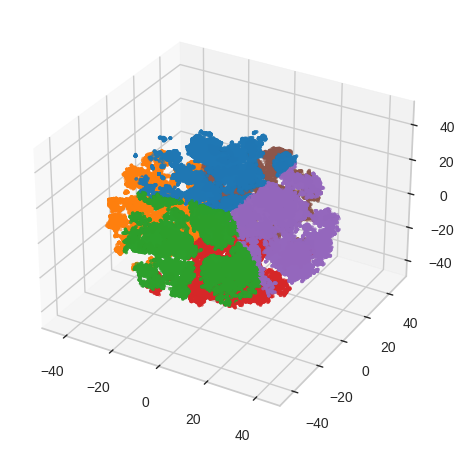

In [62]:
import matplotlib.colors as mcolors
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Créer une liste de couleurs à partir de la palette "Set1" de Matplotlib
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:10]

# Créer un dictionnaire pour mapper des couleurs aux valeurs de la liste
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}
print(color_dict)

ax.scatter(tsne_value[:,0],tsne_value[:,1],tsne_value[:,2],marker=".",c=[color_dict[i] for i in df["label"]])
plt.show()

In [63]:
result = df.groupby(['label']).mean()
result

/tmp/ipykernel_6001/825856455.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,nb_items_total,montant_total,nb_commande,mean_review_score,mean_payment_installments,mean_length_comment_title,mean_length_comment_message,mean_distance,recence,med_product_photos_qty,med_product_description_lenght
label,,,,,,,,,,,
0,1.194525,151.215707,1.020810,3.857055,2.790698,1.363330,42.750576,5.374977,312.669650,2.127620,567.599053
1,1.158989,141.990322,1.004354,3.907034,1.208567,1.541538,33.655676,5.730762,297.685744,2.315379,823.007022
2,1.057031,153.239053,1.000000,4.389498,3.067432,0.437429,14.033009,5.543470,294.419512,2.154872,742.604171
3,1.048539,153.703659,1.002759,4.429972,2.999373,1.471822,17.151344,5.895273,280.092249,2.415559,911.877806
4,1.199059,187.299651,1.000000,4.017189,4.070201,0.553199,25.118632,5.601638,320.387453,2.274404,742.160602
5,1.441886,201.088796,1.173003,4.057594,3.136163,2.934798,34.994341,5.362999,254.068831,2.024560,892.571511


In [66]:
import plotly.graph_objects as go

categories = result.columns
fig = go.Figure()

for g in result.index:
    fig.add_trace(go.Scatterpolar(
        r = result.loc[g].values,
        theta = categories,
        fill = 'toself',
        name = f'cluster #{g}'
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5] # here we can define the range
    )),
  showlegend=True,
    title="Issues with Plotly",
    title_x=0.5
)

fig.show()

In [65]:
test

NameError: name 'test' is not defined

In [ ]:
from kmodes.kprototypes import KPrototypes
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

model_Kproto = KPrototypes(n_clusters=4, init="Cao", verbose=2, n_jobs=-1, n_init=8, random_state=42)
df_std = df
df_std[num_columns] = preprocessor.fit_transform(df[num_columns])
model_Kproto.fit_predict(df_std, categorical = catColumnsPos)

In [ ]:
centroides = pca.transform(pd.DataFrame(model_Kproto.cluster_centroids_,columns=df[num_columns+cat_columns].columns))
plt.scatter(pca_value[:,0],pca_value[:,1],c=model_Kproto.labels_,marker=".",s=10)
for center in centroides:
    plt.scatter(center[0],center[1],marker='x',c='r',s=20)